In [1]:
from prc1_state import State
from prc1 import Prc1
from run_gillespie import run_gillespie_prc1
import numpy as np
import matplotlib.pyplot as plt
from gillespie import run_gillespie
from copy import deepcopy
from gillespie import *
from run_gillespie import *
from tqdm import tqdm

# microtubule_length, site_spacing, microtubule_offset, spring_constant,
                #  rest_length, k_B_T, microtubule_separation, singly_bound_detachment_rate, k0

In [2]:
microtubule_length = 10.
site_spacing = 0.2
microtubule_offset = 0
spring_constant = 2
rest_length = 32
k_B_T = 4.1
microtubule_separation = 32
singly_bound_detachment_rate = 3.2
k0 = 10
params = (microtubule_length, site_spacing, microtubule_offset, spring_constant,
                 rest_length, k_B_T, microtubule_separation, singly_bound_detachment_rate, k0)



In [3]:
for _ in range(50):
    state = State(*params)
    try:
        states = []
        for _ in range(3):
            state.single_attach_prc1(); states.append(deepcopy(state))
            state.double_attach_prc1(len(state)-1); states.append(deepcopy(state))
        state.detach_prc1(1)
        if state[2].closest_neighbor_left is None or state[2].closest_neighbor_right is None:
            states.append(deepcopy(state))
            print(state[2].closest_neighbor_left, state[2], state[2].closest_neighbor_right)
            print(state)
            error_state = states

    except:
        continue

In [4]:
initial_binding_rate = 2.8
singly_bound_detachment_rate = 4
k0 = 1
end_time = 20
num_prc1, times = run_gillespie_prc1(initial_binding_rate, singly_bound_detachment_rate, k0, end_time)

In [11]:
%timeit run_gillespie_prc1(initial_binding_rate, singly_bound_detachment_rate, k0, end_time)

165 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
# test random params for bugs
def rand_runs(n):
    for _ in tqdm(range(n)):
        initial_binding_rate, singly_bound_detachment_rate, k0 = 2*np.random.random(3)
        run_gillespie_prc1(initial_binding_rate, singly_bound_detachment_rate, k0, end_time)

rand_runs(10)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:01<00:00,  6.99it/s]


In [7]:
%load_ext line_profiler

In [18]:
%lprun -f State.set_neighbors_between_prc1 rand_runs(10)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


Timer unit: 1e-07 s

Total time: 0.674196 s
File: c:\Users\mrnob\source\repos\AdrianHou2\prc-recruitment-bayesian-analysis\python_version\prc1_state.py
Function: State.set_neighbors_between_prc1 at line 265

Line #      Hits         Time  Per Hit   % Time  Line Contents
   265                                               def set_neighbors_between_prc1(self, left_prc1, right_prc1):
   266                                                   # helper function to avoid code duplication :)
   267      9033     244691.0     27.1      3.6          if left_prc1 is not None and left_prc1.is_unattached:
   268                                                       raise RuntimeError("LEFT NEIGHBOR UNATTACHED")
   269      9033     199106.0     22.0      3.0          if right_prc1 is not None and right_prc1.is_unattached:
   270                                                       raise RuntimeError("RIGHT NEIGHBOR UNATTACHED")
   271      9033      69631.0      7.7      1.0          def set_neigh

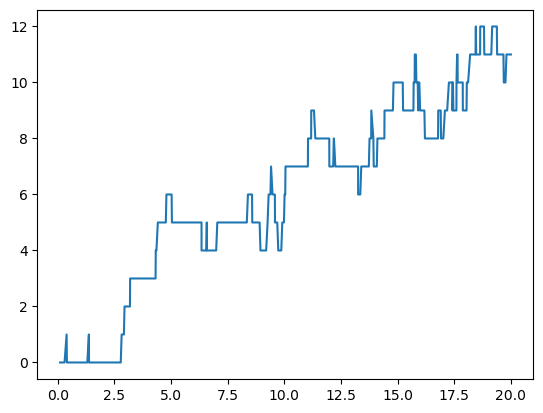

In [9]:
plt.plot(times, num_prc1)